In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/abs-spectra-v3/data_abs.csv', header=None)
ds

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,1,0,1,0,0,8,8,7,6,6,...,0,0,0,0,0,0,0,0,0,0
1,1,0,3,0,0,8,7,7,6,5,...,0,0,0,0,0,0,0,0,0,0
2,1,0,5,0,0,8,7,7,6,5,...,0,0,0,0,0,0,0,0,0,0
3,1,0,7,0,0,8,7,7,6,5,...,0,0,0,0,0,0,0,0,0,0
4,1,0,9,0,0,8,8,7,6,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230495,10,9,95,3,1,250,248,248,247,246,...,0,0,0,0,0,0,0,0,0,0
230496,10,9,95,5,1,252,253,253,253,253,...,0,0,0,0,0,0,0,0,0,0
230497,10,9,97,1,1,255,249,245,240,236,...,0,0,0,0,0,0,0,0,0,0
230498,10,9,97,3,1,254,253,252,252,250,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ds = ds[ds[4]==1] #select data for water media
ds = ds[ds[1]!=0] #core material not air
ds = ds.sample(frac=1).reset_index(drop=True)
ds

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,10,7,7,77,1,192,193,194,195,196,...,16,14,12,10,8,7,5,3,1,0
1,10,3,41,49,1,197,197,198,198,199,...,0,0,0,0,0,0,0,0,0,0
2,6,7,77,5,1,134,137,139,141,143,...,40,35,31,26,21,17,12,8,4,0
3,6,3,17,25,1,136,136,136,137,137,...,1,1,1,0,0,0,0,0,0,0
4,2,4,47,47,1,220,221,222,222,223,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114745,10,3,39,19,1,221,221,222,222,222,...,3,3,2,2,1,1,1,0,0,0
114746,1,3,17,41,1,199,199,199,200,200,...,1,0,0,0,0,0,0,0,0,0
114747,2,9,33,55,1,115,120,123,127,130,...,210,213,215,217,218,220,221,222,223,223
114748,5,9,1,71,1,125,129,132,135,137,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
num_mats = 11
spectra = np.array(ds.iloc[:, 5:])/255 # normalized spectra

m1 = np.array(ds[[0]])
m2 = np.array(ds[[1]])
t1 = np.array(ds[[2]])/100
t2 = np.array(ds[[3]])/100

geo = np.hstack((m1, m2, t1, t2))


test_split = int(0.95*ds.shape[0])



y_train = spectra[:test_split]
y_train = tf.expand_dims(y_train, axis=-1)

x_train_m1 = keras.utils.to_categorical(m1[:test_split])
x_train_m1 = tf.expand_dims(x_train_m1, axis=1)

x_train_m2 = keras.utils.to_categorical(m2[:test_split])
x_train_m2 = tf.expand_dims(x_train_m2, axis=1)

x_train_t1 = t1[:test_split]
x_train_t1 = tf.expand_dims(x_train_t1, axis=-1)
x_train_t2 = t2[:test_split]
x_train_t2 = tf.expand_dims(x_train_t2, axis=-1)

x_train = geo[:test_split]
x_train = tf.expand_dims(x_train, axis=-1)


y_test = spectra[test_split:]
y_test = tf.expand_dims(y_test, axis=-1)

x_test_m1 = keras.utils.to_categorical(m1[test_split:])
x_test_m1 = tf.expand_dims(x_test_m1, axis=1)
x_test_m2 = keras.utils.to_categorical(m2[test_split:])
x_test_m2 = tf.expand_dims(x_test_m2, axis=1)
x_test_t1 = t1[test_split:]
x_test_t1 = tf.expand_dims(x_test_t1, axis=-1)
x_test_t2 = t2[test_split:]
x_test_t2 = tf.expand_dims(x_test_t2, axis=-1)

x_test = geo[test_split:]
x_test = tf.expand_dims(x_test, axis=-1)

#  cVAE resnet model

In [ ]:
def residual_block(x_in, N_filter, kernel_size=3, strides=1,
                   conv_layer=keras.layers.Conv1D, alpha=0.3,
                   with_BN=False):
    """resnet block, default: 1D convolutions"""

    # residual connection
    if x_in.shape[-1] != N_filter or strides != 1:
        # if input!=output dimension: add BN/ReLU/conv. into shortcut
        conv_shortcut = conv_layer(
            filters=N_filter, kernel_size=1, strides=strides, padding='same')(x_in)
    else:
        # if input==output dimension: use bare input as shortcut
        conv_shortcut = x_in

    # convolutional path
    x = x_in

    x = conv_layer(filters=N_filter, kernel_size=1, strides=1,
                   padding='same', use_bias=not with_BN)(x)
    if with_BN:
        x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha)(x)

    x = conv_layer(filters=N_filter, kernel_size=kernel_size,
                   strides=strides, padding='same', use_bias=not with_BN)(x)
    if with_BN:
        x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha)(x)

    x = conv_layer(filters=N_filter, kernel_size=1, strides=1,
                   padding='same', use_bias=not with_BN)(x)
    if with_BN:
        x = keras.layers.BatchNormalization()(x)

    # add residual and main and apply a further activation
    x = keras.layers.Add()([x, conv_shortcut])
    x = keras.layers.LeakyReLU(alpha)(x)

    return x


In [ ]:
def resblock_sequence_down(x_in, N_filter, N_blocks):
    x = x_in
    for i in range(N_blocks):
        x = residual_block(x, N_filter, kernel_size=3, strides=1, with_BN=True)
    # down: use strides=2 for downsampling (more flexible, since trainable).
    x = residual_block(x, N_filter, kernel_size=3, strides=2)
    return x


def resblock_sequence_up(x_in, N_filter, N_blocks):
    x = x_in
    for i in range(N_blocks):
        x = residual_block(x, N_filter, kernel_size=3, strides=1, with_BN=True)
    # up: use upsampling (more robust than transpose convolutions with stride 2)
    x = keras.layers.UpSampling1D()(x)
    return x


def resblock_sequence_id(x_in, N_filter, N_blocks):
    # identity block sequence: input shape = output shape
    x = x_in
    for i in range(N_blocks):
        x = residual_block(x, N_filter, kernel_size=3, strides=1, with_BN=True)
    return x

#  RNG sampling layer for regularization
The latent space of a VAE is regularized via random sampling from a normal distribution during training and ragularization of these distributions using a KL loss. The KL loss will be introduced below.
Here we define a sampling layer that generates randomly perturbed latent vectors:

In [ ]:
class SamplingRNG(keras.layers.Layer):
    """layer to sample a normal distributed random numbers z with mean `z_mean` and logarithmic variance `z_log_var`"""

    def call(self, inputs):
        z_mean, z_var_log = inputs
        epsilon = keras.backend.random_normal(shape=tf.shape(z_mean)[1:])
        z = z_mean + keras.backend.exp(0.5 * z_var_log) * epsilon
        return z

# define the encoder
The cVAE consists of first an encoder. This compresses the condition (target spectrum) and the geometry (design) into a latent space.

In [ ]:
# keras.backend.clear_session()

# some config for the cVAE
latent_dim = 2   # for interpretability
N_blocks = 3     # Nr of resblocks between upsamplings


# input layers
condition_target_spec_input = keras.layers.Input(
    shape=y_train.shape[1:], name='condition_in')
# design_in = keras.Input(shape=x_train.shape[1:], name='design_in')
design_in_m1 = keras.Input(shape=x_train_m1.shape[1:], name='design_in_m1')
design_in_m2 = keras.Input(shape=x_train_m2.shape[1:], name='design_in_m2')
design_in_t1 = keras.Input(shape=x_train_t1.shape[1:], name='design_in_t1')
design_in_t2 = keras.Input(shape=x_train_t2.shape[1:], name='design_in_t2')

# spectrum path
x = condition_target_spec_input
x = resblock_sequence_down(x, N_filter=16, N_blocks=N_blocks)   # 64 --> 32
x = resblock_sequence_down(x, N_filter=32, N_blocks=N_blocks)   # 32 --> 16
x = resblock_sequence_down(x, N_filter=64, N_blocks=N_blocks)  # 16 --> 8
x = resblock_sequence_down(x, N_filter=128, N_blocks=N_blocks)  # 8 --> 4



x_spec = keras.layers.Flatten()(x)

# geometry path
x_m1 = design_in_m1
x_m2 = design_in_m2
x_t1 = design_in_t1
x_t2 = design_in_t2



x_1 = keras.layers.Concatenate(axis=-1)([x_m1, x_t1])
x_2 = keras.layers.Concatenate(axis=-1)([x_m2, x_t2])
x = keras.layers.Concatenate(axis=1)([x_1, x_2])

x = resblock_sequence_id(x, N_filter=64, N_blocks=N_blocks) 


x_design = keras.layers.Flatten()(x)

# merge both paths
x = keras.layers.Concatenate()([x_spec, x_design])
x = keras.layers.Dense(256)(x)
x = keras.layers.LeakyReLU(alpha=1e-1)(x)

# output: latent sampling
z_mean = keras.layers.Dense(latent_dim)(x)
z_var_log = keras.layers.Dense(latent_dim)(x)
z = SamplingRNG()([z_mean, z_var_log])


encoder = keras.Model(
    [design_in_m1, design_in_m2, design_in_t1, design_in_t2, condition_target_spec_input],
    [z_mean, z_var_log, z],
    name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 condition_in (InputLayer)   [(None, 200, 1)]             0         []                            
                                                                                                  
 conv1d_1 (Conv1D)           (None, 200, 16)              16        ['condition_in[0][0]']        
                                                                                                  
 batch_normalization (Batch  (None, 200, 16)              64        ['conv1d_1[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 leaky_re_lu (LeakyReLU)     (None, 200, 16)              0         ['batch_normalization[0]

# define the decoder
The second stage of the cVAE, and the actual inverse model after training, is the decoder.  It takes as input the condition (target spectrum) and a latent vector z. During training multiple design solutions for a given target spectrum will be mapped on different latent vectors z so that the latent space can be used to distinguish different solutions.

In [ ]:
# condition_target_spec_input
latent_in = keras.Input(shape=(latent_dim,), name='latent_in')

# spectrum path
x = condition_target_spec_input
x = resblock_sequence_down(x, N_filter=16, N_blocks=N_blocks)   # 64 --> 32
x = resblock_sequence_down(x, N_filter=32, N_blocks=N_blocks)   # 32 --> 16
x = resblock_sequence_down(x, N_filter=64, N_blocks=N_blocks)  # 16 --> 8
x = resblock_sequence_down(x, N_filter=128, N_blocks=N_blocks)  # 8 --> 4


x_spec = keras.layers.Flatten()(x)

# merge with latent
x = keras.layers.Concatenate()([x_spec, latent_in])

# geometry generator path
x = keras.layers.Dense(1*128)(x)
x = keras.layers.Reshape((1, 128))(x)


x = resblock_sequence_id(x, N_filter=128, N_blocks=N_blocks)



x_m1 = keras.layers.Dense(512, activation='relu')(x)
# x_m1 = Dropout(0.4)(x_m1)
x_m1 = keras.layers.Dense(512, activation='relu')(x_m1)
# x_m1 = Dropout(0.4)(x_m1)
out_design_m1 = keras.layers.Dense(num_mats, activation='softmax', name='design_out_m1')(x_m1)

x_m2 = keras.layers.Dense(512, activation='relu')(x)
# x_m2 = Dropout(0.4)(x_m2)
x_m2 = keras.layers.Dense(512, activation='relu')(x_m2)
# x_m2 = Dropout(0.4)(x_m2)
out_design_m2 = keras.layers.Dense(num_mats, activation='softmax', name='design_out_m2')(x_m2)

x_t1 = keras.layers.Dense(512, activation='relu')(x)
# x_t1 = Dropout(0.4)(x_t1)
x_t1 = keras.layers.Dense(512, activation='relu')(x_t1)
# x_t1 = Dropout(0.4)(x_t1)
out_design_t1 = keras.layers.Dense(1, activation='linear', name='design_out_t1')(x_t1)

x_t2 = keras.layers.Dense(512, activation='relu')(x)
# x_t2 = Dropout(0.4)(x_t2)
x_t2 = keras.layers.Dense(512, activation='relu')(x_t2)
# x_t2 = Dropout(0.4)(x_t2)
out_design_t2 = keras.layers.Dense(1, activation='linear', name='design_out_t2')(x_t2)



decoder = keras.Model(
    [latent_in, condition_target_spec_input],
    [out_design_m1, out_design_m2, out_design_t1, out_design_t2], name="decoder")
decoder.summary()

Model: "decoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 condition_in (InputLayer)   [(None, 200, 1)]             0         []                            
                                                                                                  
 conv1d_67 (Conv1D)          (None, 200, 16)              16        ['condition_in[0][0]']        
                                                                                                  
 batch_normalization_45 (Ba  (None, 200, 16)              64        ['conv1d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 leaky_re_lu_58 (LeakyReLU)  (None, 200, 16)              0         ['batch_normalization_45

# Define the full cVAE

In [ ]:
z_mean_out, z_var_log_out, z_rnd_out = encoder([design_in_m1, design_in_m2, design_in_t1, design_in_t2,condition_target_spec_input])

[design_pred_m1, design_pred_m2, design_pred_t1, design_pred_t2] = decoder([z_rnd_out, condition_target_spec_input])   # use randomized latent

cVAE = keras.Model(
    [design_in_m1, design_in_m2, design_in_t1, design_in_t2, condition_target_spec_input],
    [design_pred_m1, design_pred_m2, design_pred_t1, design_pred_t2],
    name="cVAE")
cVAE.summary()

Model: "cVAE"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 design_in_m1 (InputLayer)   [(None, 1, 11)]              0         []                            
                                                                                                  
 design_in_m2 (InputLayer)   [(None, 1, 11)]              0         []                            
                                                                                                  
 design_in_t1 (InputLayer)   [(None, 1, 1)]               0         []                            
                                                                                                  
 design_in_t2 (InputLayer)   [(None, 1, 1)]               0         []                            
                                                                                               

# cVAE losses: reconstruction and KL
In order to regularize the latent space, we need to add a Kullback-Leibler divergence (KL) loss in addition to the MSE reconstruction loss. Adding custom loss functions in keras can be done via model.add_loss. We also add according metrics, those are only used for the status messages during training. Finally we can compile and train the model with the optimizer (AdamW).

In [ ]:
input_dim = np.product(x_train.shape[1:])
latent_dim = np.product(z.shape[1:])
beta = 0.001   # weight of KL loss. If too high, reconstruction will suffer.

# reconstruction loss materials

def categorical_ce(y_true, y_pred):
    cce = keras.losses.CategoricalCrossentropy(name='reconstr_loss_m1')
    return cce(y_true, y_pred)

reconstruction_loss_m1 = categorical_ce(design_in_m1, design_pred_m1)

cVAE.add_loss(reconstruction_loss_m1)
cVAE.add_metric(reconstruction_loss_m1, name='reconstr_loss_m1')


m1_acc = keras.metrics.categorical_accuracy(design_in_m1, design_pred_m1)
cVAE.add_metric(m1_acc, name="m1_accuracy")



def categorical_ce1(y_true, y_pred):
    cce1 = keras.losses.CategoricalCrossentropy(name='reconstr_loss_m2')
    return cce1(y_true, y_pred)

reconstruction_loss_m2 = categorical_ce1(design_in_m2, design_pred_m2)

cVAE.add_loss(reconstruction_loss_m2)
cVAE.add_metric(reconstruction_loss_m2, name='reconstr_loss_m2')

m2_acc = keras.metrics.categorical_accuracy(design_in_m2, design_pred_m2)
cVAE.add_metric(m2_acc, name="m2_accuracy")

# reconstruction loss thickness
reconstruction_loss_t1 = keras.losses.mse(
    keras.backend.flatten(design_in_t1),
    keras.backend.flatten(design_pred_t1))
cVAE.add_loss(reconstruction_loss_t1)
cVAE.add_metric(reconstruction_loss_t1, name='reconstr_loss_t1', aggregation='mean')

reconstruction_loss_t2 = keras.losses.mse(
    keras.backend.flatten(design_in_t2),
    keras.backend.flatten(design_pred_t2))
cVAE.add_loss(reconstruction_loss_t2)
cVAE.add_metric(reconstruction_loss_t2, name='reconstr_loss_t2', aggregation='mean')

# KL loss
kl_loss = keras.backend.sum(
    1 + z_var_log_out - keras.backend.square(z_mean_out) - keras.backend.exp(z_var_log_out), axis=-1)
kl_loss = beta * keras.backend.mean(-0.5 / latent_dim * kl_loss)
cVAE.add_loss(kl_loss)
cVAE.add_metric(kl_loss, name='kl_loss', aggregation='mean')

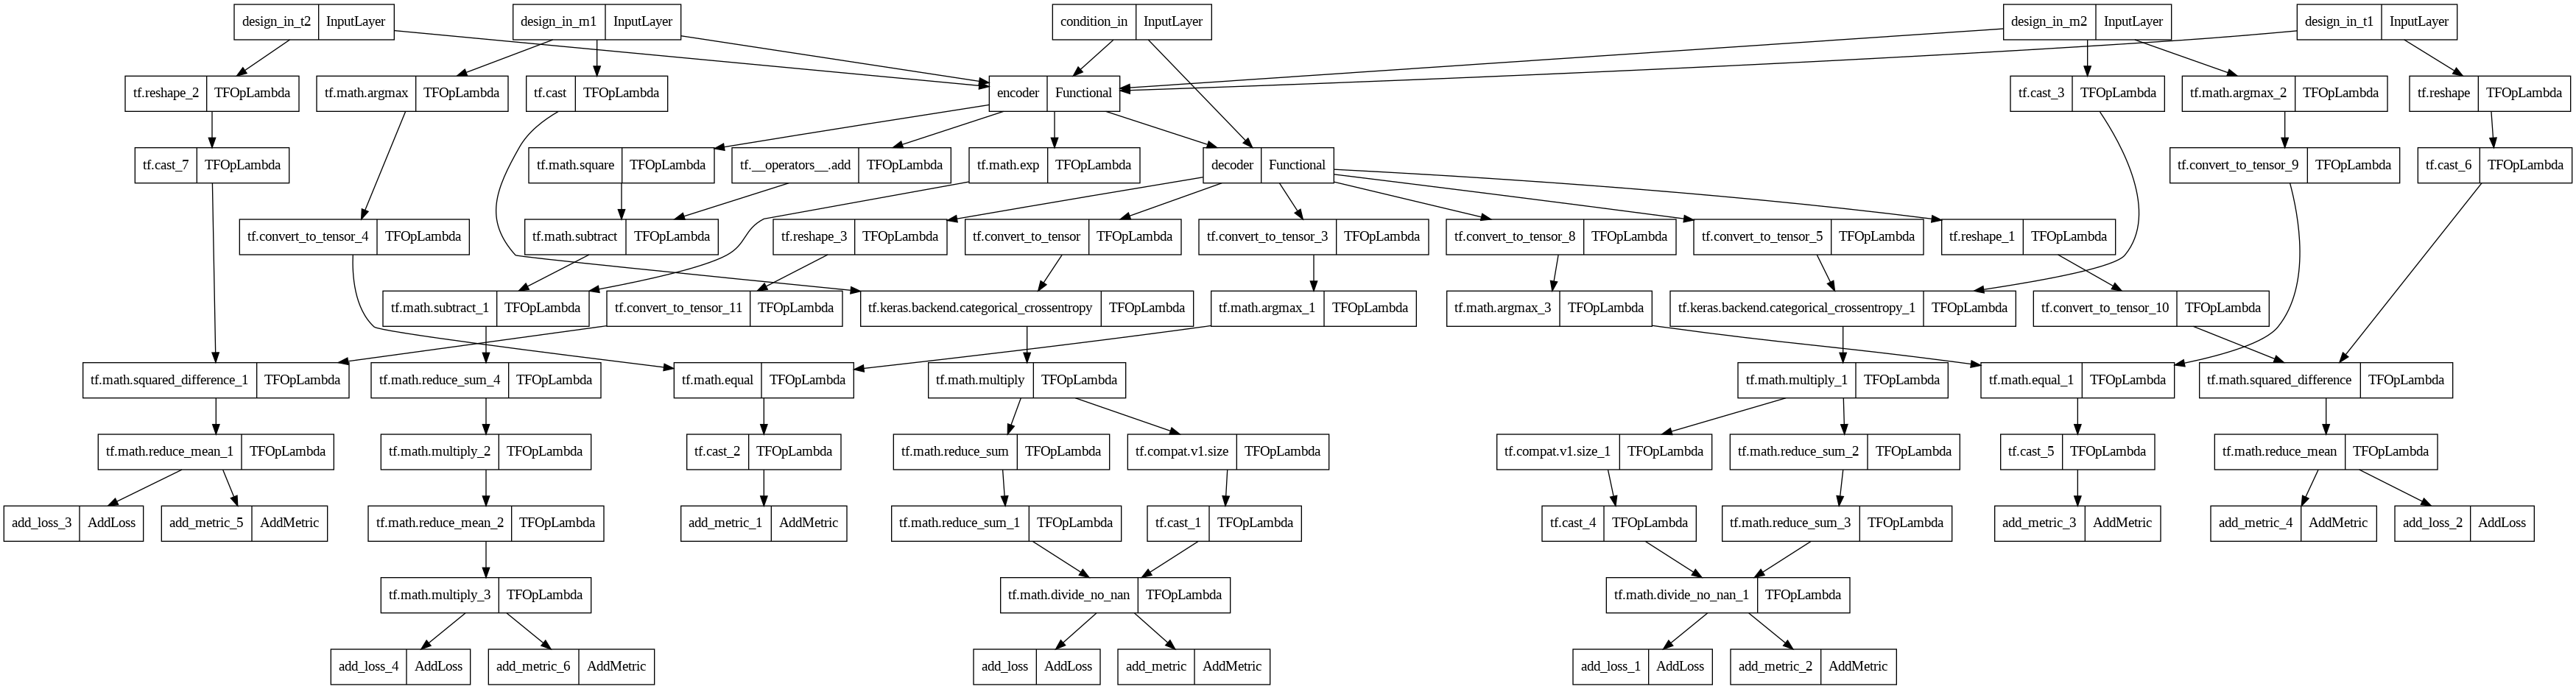

In [ ]:
from keras.utils import plot_model
plot_model(cVAE)

# Train the cVAE end-to-end
In contrast to the 2-stage training of the Tandem, the cVAE is trained end-to-end in a single run. Note that we have now two inputs for the full cVAE model: designs and spectra, the model output are the reconstructed designs, which are compared to the input designs via MSE loss. After training, for inverse design we will use only the decoder part.

In [ ]:
# compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
cVAE.compile(optimizer=optimizer)


## ReduceLROnPlateau
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=1/3, patience=4, verbose=1)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)
callbacks = [reduce_lr, early_stop]
# fit the model with BN --> increasing batchsize schdedule
hist = None  # global history after BS incrase
for i in range(3):  # 3x16 epochs, doubling batchsize
    _h = cVAE.fit(x=[x_train_m1, x_train_m2, x_train_t1, x_train_t2, y_train],
                  y=[x_train_m1, x_train_m2, x_train_t1, x_train_t2],
                  validation_split=.2,
                  batch_size=32 * 2**i, epochs=16,
                  callbacks = callbacks)
    if hist is None:
        hist = _h
    else:
        for k in hist.history:
            hist.history[k] = np.concatenate([hist.history[k], _h.history[k]])



Epoch 1/16
2726/2726 [==============================] - 493s 147ms/step - loss: 0.8071 - reconstr_loss_m1: 0.4082 - m1_accuracy: 0.8479 - reconstr_loss_m2: 0.2440 - m2_accuracy: 0.9191 - reconstr_loss_t1: 0.0411 - reconstr_loss_t2: 0.0414 - kl_loss: 0.0724 - val_loss: 0.2309 - val_reconstr_loss_m1: 0.0338 - val_m1_accuracy: 0.9921 - val_reconstr_loss_m2: 0.0931 - val_m2_accuracy: 0.9664 - val_reconstr_loss_t1: 0.0302 - val_reconstr_loss_t2: 0.0279 - val_kl_loss: 0.0459 - lr: 2.0000e-04
Epoch 2/16
2726/2726 [==============================] - 397s 146ms/step - loss: 0.1695 - reconstr_loss_m1: 0.0338 - m1_accuracy: 0.9892 - reconstr_loss_m2: 0.0540 - m2_accuracy: 0.9822 - reconstr_loss_t1: 0.0204 - reconstr_loss_t2: 0.0210 - kl_loss: 0.0403 - val_loss: 0.1935 - val_reconstr_loss_m1: 0.0080 - val_m1_accuracy: 0.9979 - val_reconstr_loss_m2: 0.1033 - val_m2_accuracy: 0.9600 - val_reconstr_loss_t1: 0.0257 - val_reconstr_loss_t2: 0.0210 - val_kl_loss: 0.0356 - lr: 2.0000e-04
Epoch 3/16
2726/27

# plot loss

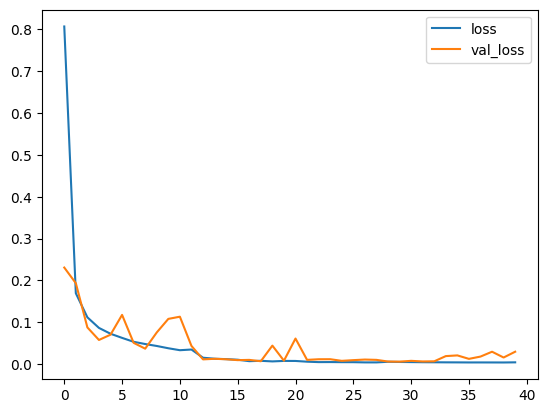

In [ ]:
plt.figure()
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
cVAE.save('/content/drive/MyDrive/abs-spectra-v3/models/cVAE_categorical.keras')
encoder.save('/content/drive/MyDrive/abs-spectra-v3/models/encoder_categorical.keras')
decoder.save('/content/drive/MyDrive/abs-spectra-v3/models/decoder_categorical.keras')